<a href="https://colab.research.google.com/github/WicCaesar/Pro-Training-AI-ML/blob/main/Beginner01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files;
uploaded = files.upload();

Saving Salary_dataset.csv to Salary_dataset.csv


In [2]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np;

In [3]:
# Read the data from the CSV file with read from Numpy
#data = np.genfromtxt("Salary_dataset.csv", delimiter=',', dtype=None, skip_header=1);
data = np.genfromtxt("Salary_dataset.csv", delimiter=',', dtype=None, skip_header=1, usecols=(1,2));

print(data);

[[1.20000e+00 3.93440e+04]
 [1.40000e+00 4.62060e+04]
 [1.60000e+00 3.77320e+04]
 [2.10000e+00 4.35260e+04]
 [2.30000e+00 3.98920e+04]
 [3.00000e+00 5.66430e+04]
 [3.10000e+00 6.01510e+04]
 [3.30000e+00 5.44460e+04]
 [3.30000e+00 6.44460e+04]
 [3.80000e+00 5.71900e+04]
 [4.00000e+00 6.32190e+04]
 [4.10000e+00 5.57950e+04]
 [4.10000e+00 5.69580e+04]
 [4.20000e+00 5.70820e+04]
 [4.60000e+00 6.11120e+04]
 [5.00000e+00 6.79390e+04]
 [5.20000e+00 6.60300e+04]
 [5.40000e+00 8.30890e+04]
 [6.00000e+00 8.13640e+04]
 [6.10000e+00 9.39410e+04]
 [6.90000e+00 9.17390e+04]
 [7.20000e+00 9.82740e+04]
 [8.00000e+00 1.01303e+05]
 [8.30000e+00 1.13813e+05]
 [8.80000e+00 1.09432e+05]
 [9.10000e+00 1.05583e+05]
 [9.60000e+00 1.16970e+05]
 [9.70000e+00 1.12636e+05]
 [1.04000e+01 1.22392e+05]
 [1.06000e+01 1.21873e+05]]


In [4]:
# Separate the features (YearsExperience) from the target variable (Salary)
X = data[:, 0]; # All rows, all columns except the last one
y = data[:, -1];  # All rows, only the last column
# Assuming the last column is the target (y) and all others are features (X)

print(X, y);

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6] [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


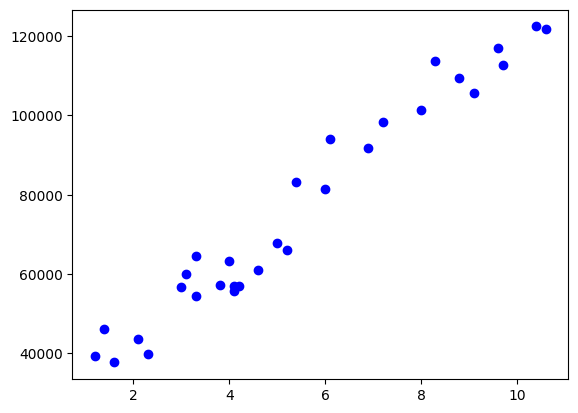

In [5]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt;

#You have to reproduce this graph
ex00 = plt.scatter(X, y, c='b');

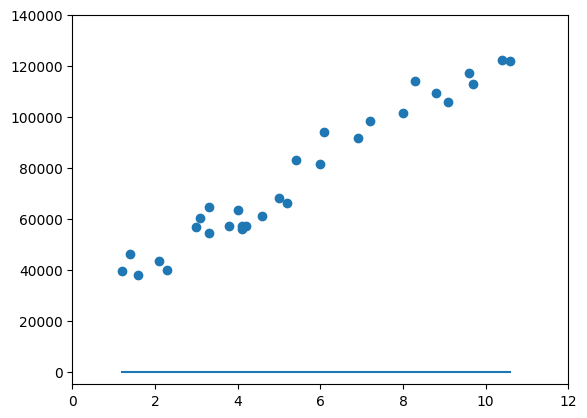

In [6]:
# Let's create a function that displays the point line with the bar.
def visualize(theta, X, y):
    plt.scatter(X, y)
    #plt.axhline(0); #* I wrongly used this to force the line to show on 0.

    # Plot the regression line
    b = theta[0]; #* Estimated intercept (value of y in the regression line when X = 0).
    m = theta[1]; #* Estimated slope.

    regression_line = m * X + b;
    plt.plot(X, regression_line);
    plt.xticks([0, 2, 4, 6, 8, 10, 12]); #* Another method, adding by hand.
    plt.ylim([-5000, 140000]); #* Forces some values to appear on the axis.
    plt.show();

theta = np.zeros(2); #* Initialises the theta array to zero.
visualize(theta, X, y);

#! WHY ISN'T THE REGRESSION LINE PARALLEL THROUGHOUT THE X AXIS?

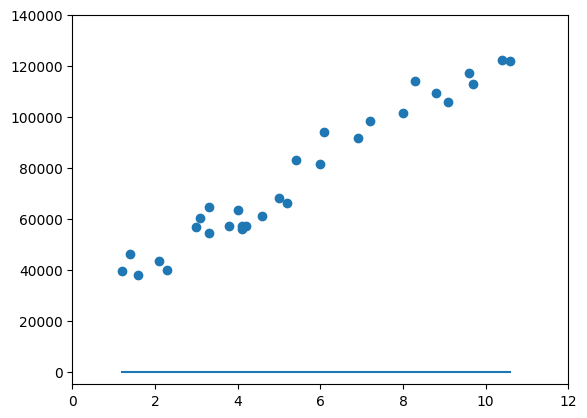

In [7]:
#! DO NOT EXECUTE! FUCK!
# Ok, let's test our function now, you should get a result comparable to this one

theta = np.zeros(2)
visualize(theta, X, y)

In [8]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    b = theta[0]; #* Estimated intercept (value of y in the regression line when X = 0).
    m = theta[1]; #* Estimated slope.

    prediction = m * X + b;
    return (prediction);

#print(f"predict: {predict(X, theta)}");

#! WHY AM I DOING THE SAME THING THAT WAS DONE TO CREATE THE REGRESSION LINE ABOVE?

In [9]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    m = X.shape[0]; #* Amount of training examples.
    #print(f"m: {m}");
    theta = theta.copy(); #* Resets theta.

    # Loop over the number of iterations
    for _ in range(num_iters):
        predictions = predict(X, theta);
        errors = predictions - y;
        #print(f"theta[0]: {theta[0]}");
        #print(f"theta[1]: {theta[1]}");
        #print(f"predictions: {predictions}");
        #print(f"errors: {errors}");

        # Perform one iteration of gradient descent (i.e., update theta once)
        gradient_0 = (1 / m) * np.sum(errors);
        gradient_1 = (1 / m) * np.sum(errors * X);

        theta[0] = theta[0] - alpha * gradient_0; #* b, intercept.
        theta[1] = theta[1] - alpha * gradient_1; #* m, slope.
    return (theta);

In [10]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2);
finetuned_theta = fit(X, y, theta, 0.01, 1000);
print(finetuned_theta)

#* Iterates through the array and prints each element with 11 decimal places (by Gemini).
#print("[", end="")
#for i, val in enumerate(finetuned_theta):
#    print(f"{val:.11f}", end="")
#    if i < len(finetuned_theta) - 1:
#        print(", ", end="")
#print("]")

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[21912.58918422  9880.81400461]


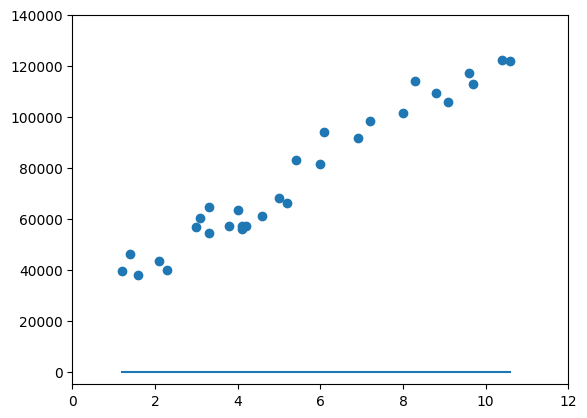

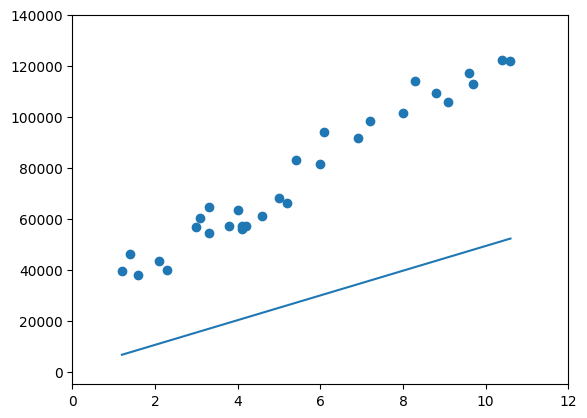

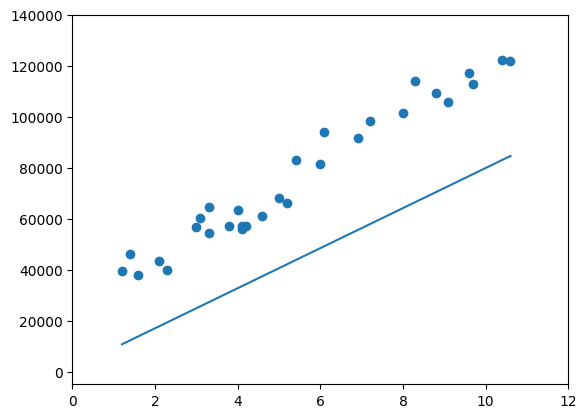

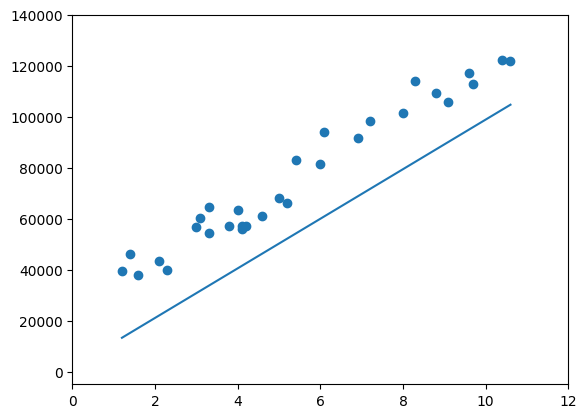

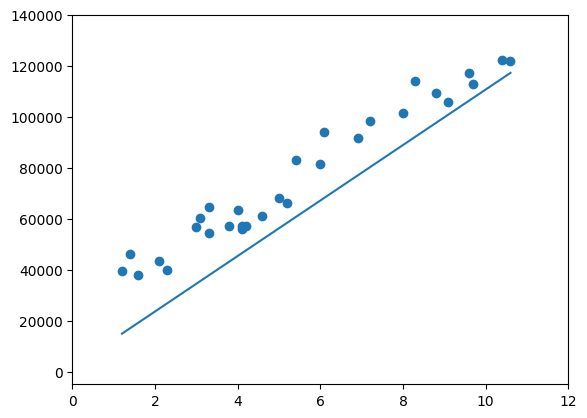

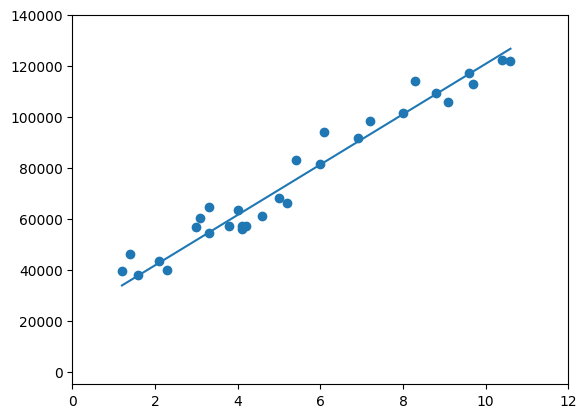

In [11]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = np.zeros(2);
visualize(fit(X, y, theta, 0.01, 0), X, y)
visualize(fit(X, y, theta, 0.01, 1), X, y)
visualize(fit(X, y, theta, 0.01, 2), X, y)
visualize(fit(X, y, theta, 0.01, 3), X, y)
visualize(fit(X, y, theta, 0.01, 4), X, y)
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [12]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    predictions = predict(X, theta);
    errors = predictions - y;

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    m = X.shape[0];
    cost = (1 / (2 * m)) * np.dot(errors, errors);

    # Return the computed cost as a measure of model fit
    return (cost);

print(f"cost: {cost(X, y, fit(X, y, theta, 0.01, 1000))}");

#! STUDY MORE ABOUT SHAPING.

cost: 16540035.376928234


In [13]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0]);
print(cost_for_theta_zero);

3251553638.866667


In [14]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration
    theta = theta.copy(); #* Resets theta.

    # Loop over the specified number of iterations
    for itr in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)
        predictions = predict(X, theta);
        errors = predictions - y;

        # Update the temporary values of theta for both coefficients using the gradient descent formula
        gradient_0 = (1 / m) * np.sum(errors);
        gradient_1 = (1 / m) * np.sum(errors * X);

        # Update the theta values
        theta[0] = theta[0] - alpha * gradient_0; #* Updates intercept (b).
        theta[1] = theta[1] - alpha * gradient_1; #* Updates slope (m).

        # Calculate and append the cost for the current theta values to the history list
        cost = (1 / (2 * m)) * np.dot(errors, errors);

        # Perform one iteration of gradient descent (update theta values)
        J_history.append(cost);

    # Return the final theta values and the list of cost values over iterations
    return (theta, J_history)

In [15]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

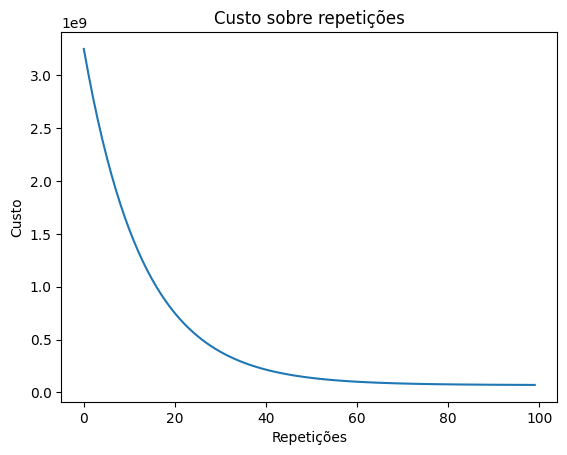

In [16]:
#You have to reproduce this graph

plt.plot(J_history);
plt.xlabel('Repetições');
plt.ylabel('Custo'); #* y_predict - y_actual, as iterations increase, the predicted values get more and more similar to the actual values.
plt.title('Custo sobre repetições');
plt.show();

In [17]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Salário previsto para {} anos de experiência: {}.".format(years_experience, predicted_salary))

Salário previsto para 10 anos de experiência: 127134.91360616997.
